In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectFromModel

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into 70% Training and 30% Testing, ensuring class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Preprocess the data: Use StandardScaler to normalize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM model using sklearn.svm.SVC with default parameters
svm = SVC()
svm.fit(X_train, y_train)

# Perform Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid.best_params_
print(f"Best parameters from GridSearchCV: {best_params}")

# Evaluate the trained model
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Identify the most important features using SelectFromModel with LinearSVC
linear_svc = LinearSVC(C=0.01, penalty='l1', dual=False, max_iter=2000)
linear_svc.fit(X_train, y_train)
model = SelectFromModel(linear_svc, prefit=True)
important_features = model.get_support(indices=True)
print(f"Important features indices: {important_features}")

# Generate a confusion matrix and calculate F1-score, Precision, Recall, False Alarm Rate
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
false_alarm_rate = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1])

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1-score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"False Alarm Rate: {false_alarm_rate}")

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [3]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert classification report to a DataFrame
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose().round(2)
class_report_df["support"] = class_report_df["support"].astype(int)  # Keep support as integer

conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels (from the dataset)
class_names = data.target_names  # ['malignant', 'benign']

# Print results with a table
conf_matrix_table = []
headers = ['', 'Predicted: ' + class_names[0], 'Predicted: ' + class_names[1]]
for i in range(len(class_names)):
    row = ['Actual: ' + class_names[i]] + list(conf_matrix[i])
    conf_matrix_table.append(row)

# Print formatted table
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_table, headers=headers, tablefmt='grid', stralign='center'))
print("\nClassification Report:")
print(tabulate(class_report_df, headers='keys', tablefmt='grid', stralign='center', numalign='center'))

Accuracy: 0.96

Confusion Matrix:
+-------------------+------------------------+---------------------+
|                   |   Predicted: malignant |   Predicted: benign |
+===================+========================+=====================+
| Actual: malignant |                     41 |                   2 |
+-------------------+------------------------+---------------------+
|  Actual: benign   |                      3 |                  68 |
+-------------------+------------------------+---------------------+

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |  precision  |  recall  |  f1-score  |  support  |
+==============+=============+==========+============+===========+
|      0       |    0.93     |   0.95   |    0.94    |    43     |
+--------------+-------------+----------+------------+-----------+
|      1       |    0.97     |   0.96   |    0.96    |    71     |
+--------------+-------------+----------+------------+---

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets, ensuring class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix_table = []
headers = ['', 'Predicted: ' + class_names[0], 'Predicted: ' + class_names[1]]
for i in range(len(class_names)):
    row = ['Actual: ' + class_names[i]] + list(conf_matrix[i])
    conf_matrix_table.append(row)

# Print formatted table
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_table, headers=headers, tablefmt='grid', stralign='center'))
print("\nClassification Report:")
print(tabulate(class_report_df, headers='keys', tablefmt='grid', stralign='center', numalign='center'))

Accuracy: 0.98

Confusion Matrix:
+-------------------+------------------------+---------------------+
|                   |   Predicted: malignant |   Predicted: benign |
+===================+========================+=====================+
| Actual: malignant |                     62 |                   2 |
+-------------------+------------------------+---------------------+
|  Actual: benign   |                      1 |                 106 |
+-------------------+------------------------+---------------------+

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |  precision  |  recall  |  f1-score  |  support  |
+==============+=============+==========+============+===========+
|      0       |    0.93     |   0.95   |    0.94    |    43     |
+--------------+-------------+----------+------------+-----------+
|      1       |    0.97     |   0.96   |    0.96    |    71     |
+--------------+-------------+----------+------------+---

In [5]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the DataFrame
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


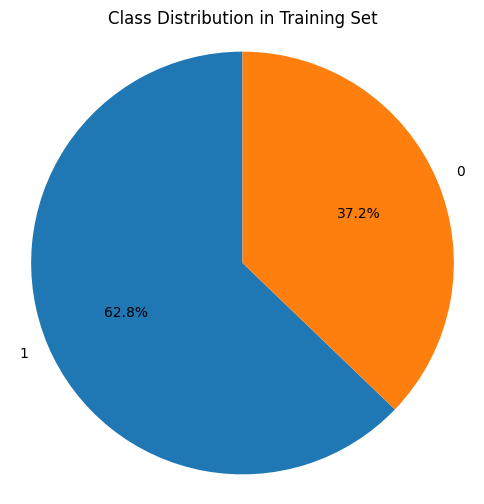

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each class in the training set
class_counts = pd.Series(y_train).value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Training Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0      -0.709821     -0.258417       -0.637396  -0.711996         1.628430   
1      -0.830331      2.231127       -0.874980  -0.779081        -1.597569   
2      -1.011097     -0.227270       -1.035172  -0.911780        -1.077779   
3      -0.382721     -0.111581       -0.408966  -0.453660         0.072810   
4      -0.804508     -1.401961       -0.810071  -0.773196         0.191319   
..           ...           ...             ...        ...              ...   
393     0.340343      0.682671        0.300456   0.175998        -0.391476   
394     1.559795     -0.098232        1.572840   1.665990         1.440916   
395    -0.127353     -1.375263       -0.158900  -0.240930         0.050309   
396     0.848209     -0.058186        0.902945   0.718562         1.373411   
397    -1.202193     -0.285115       -1.127543  -1.025059         0.090062   

     mean compactness  mean concavity  mean concave points  mea

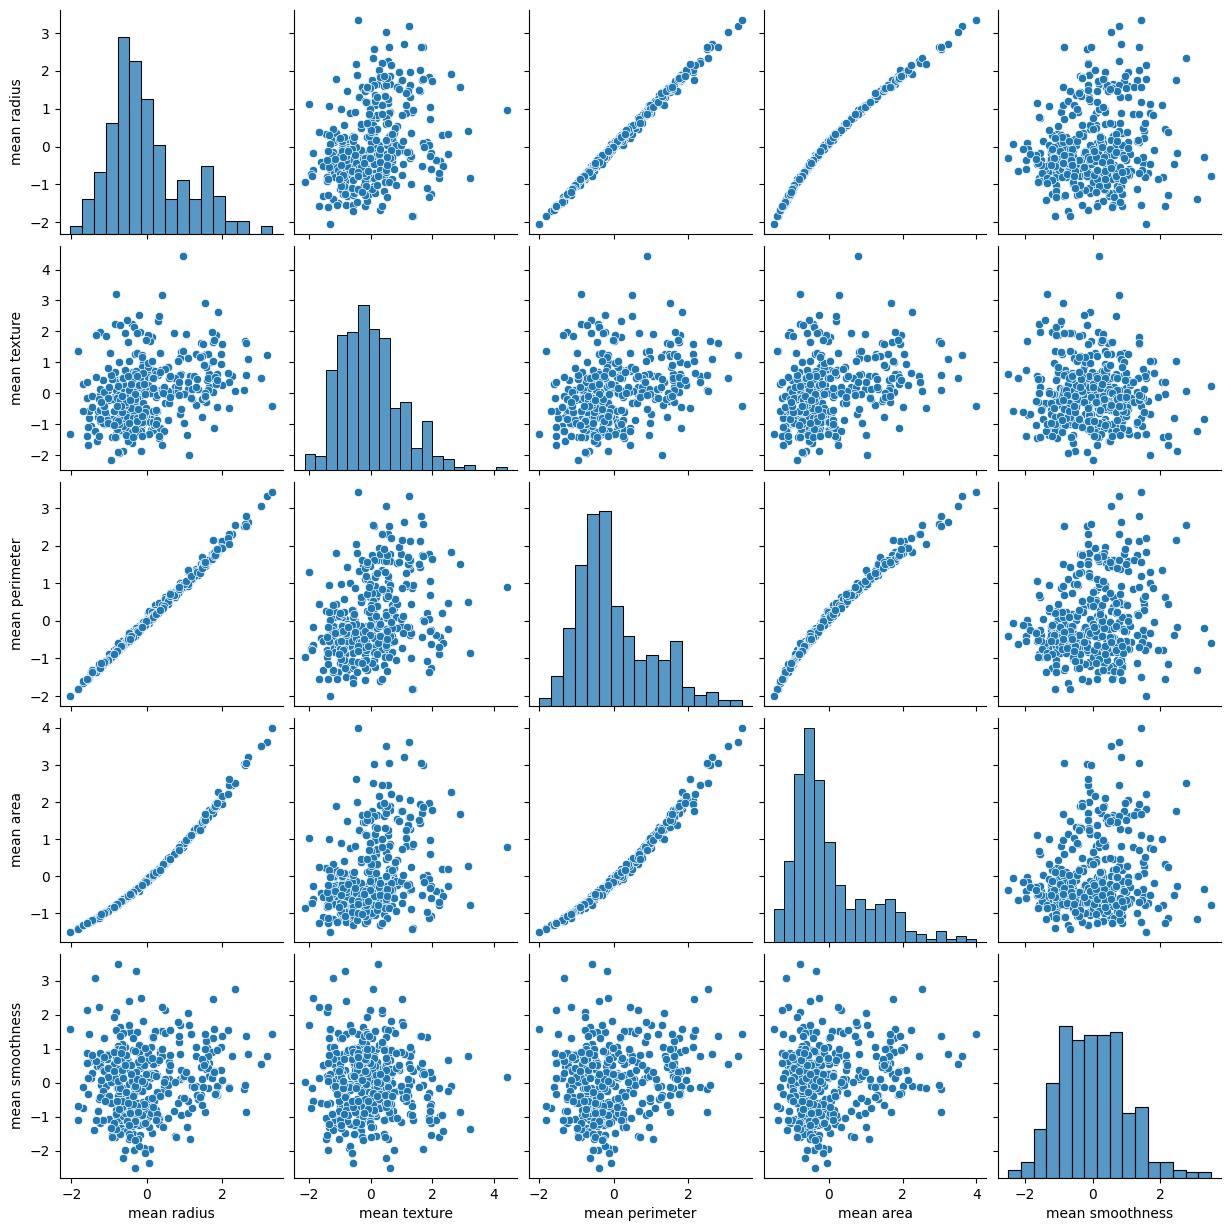

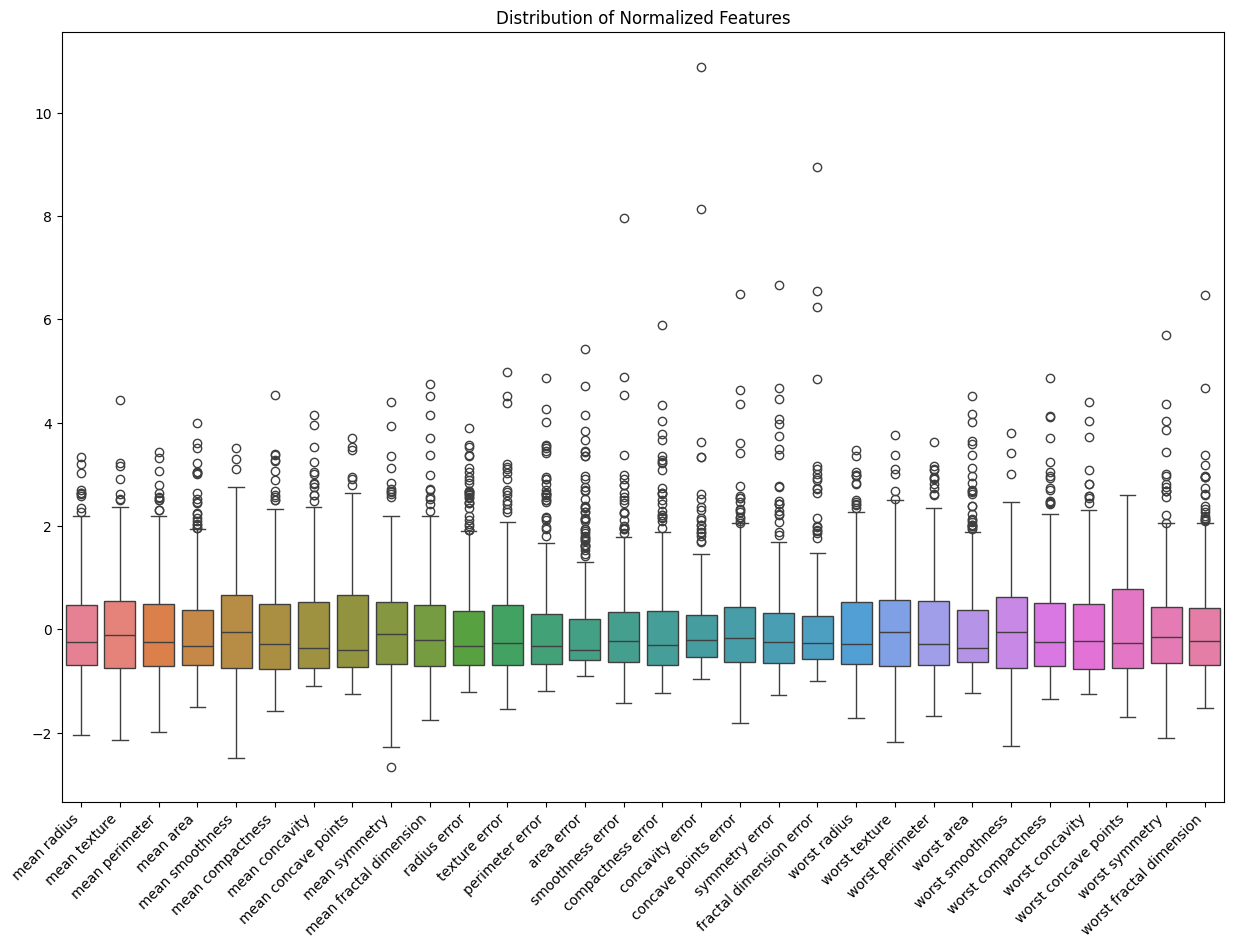

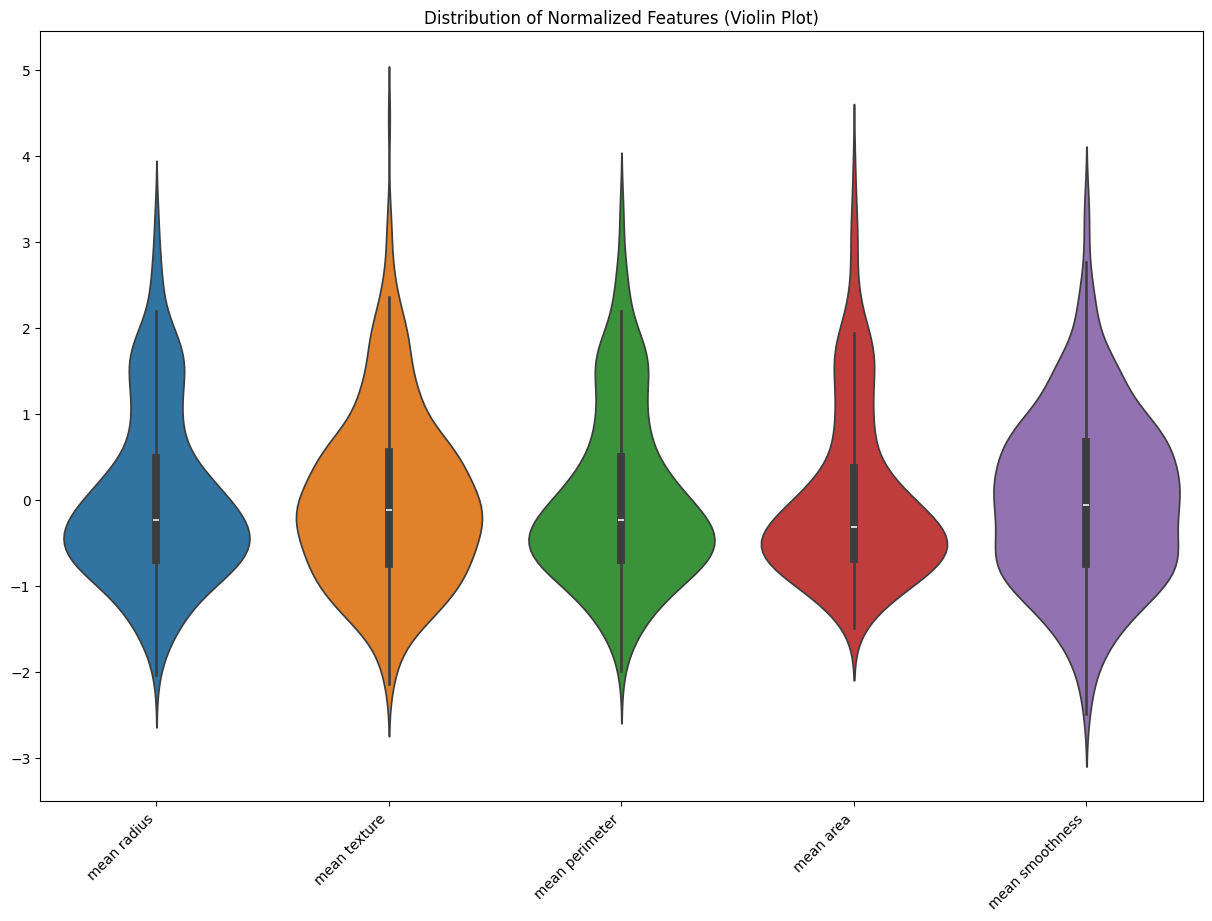

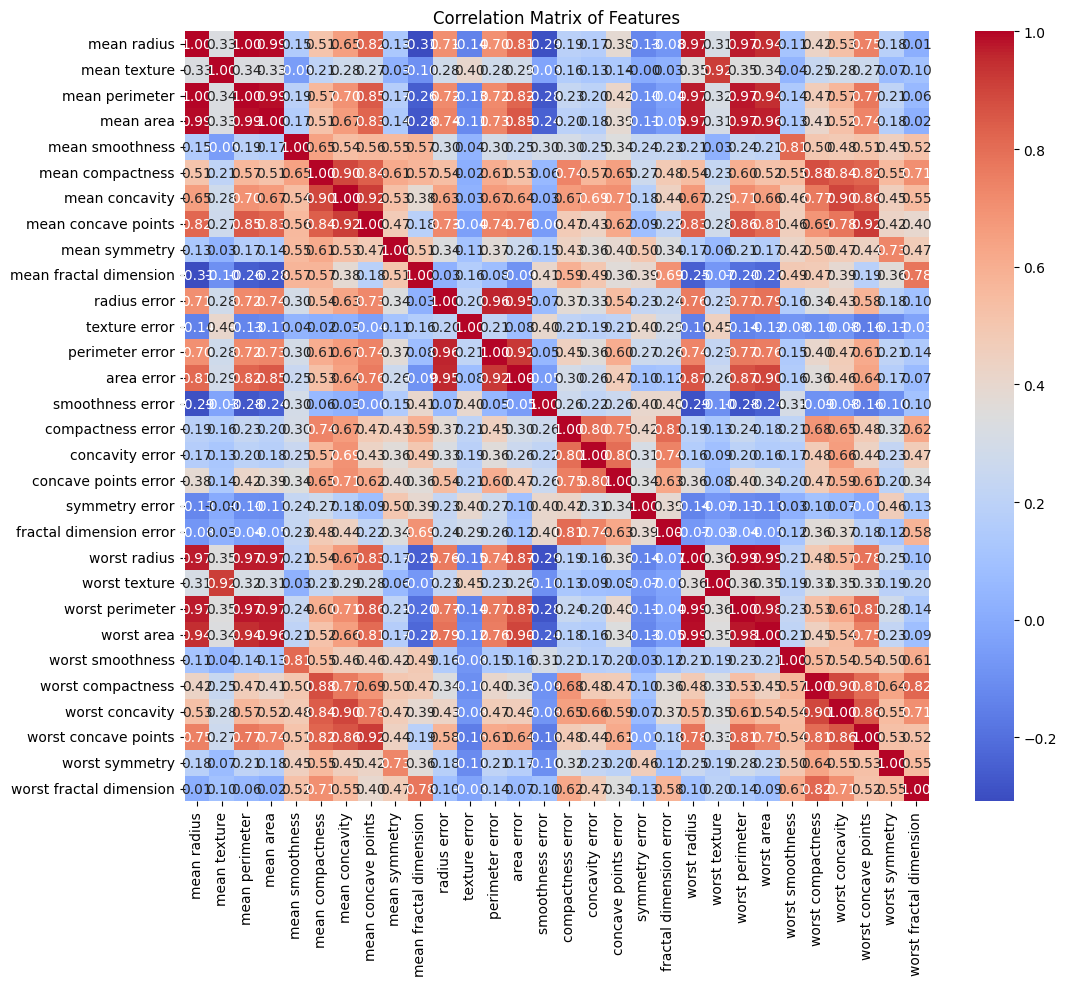

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Create a DataFrame for the normalized training data
features = data.feature_names
df_normalized = pd.DataFrame(X_train, columns=features)

# Display the normalized feature values
print(df_normalized)

# Graphical presentation using Seaborn's pairplot
#  Choose a subset of features to avoid an overly complex plot
selected_features = features[:5] # Adjust as needed
sns.pairplot(df_normalized[selected_features])
plt.show()


# Box plot for all features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_normalized)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Normalized Features')
plt.show()

# Violin Plot for selected features
plt.figure(figsize=(15,10))
sns.violinplot(data = df_normalized[selected_features])
plt.xticks(rotation=45,ha='right')
plt.title('Distribution of Normalized Features (Violin Plot)')
plt.show()

# Heatmap of correlations between features
plt.figure(figsize=(12,10))
correlations = df_normalized.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


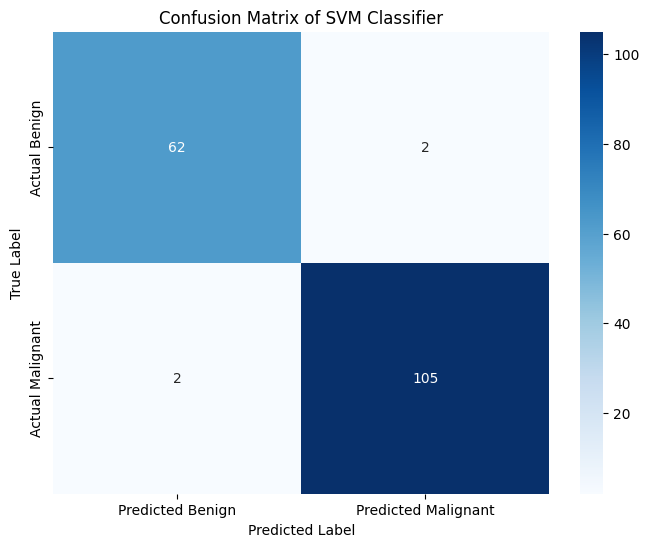

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined and scaled
# ... (Your existing code for loading data, splitting, and scaling) ...

# Train an SVM model with default parameters
svm_classifier = SVC()  # Using default parameters
svm_classifier.fit(X_train, y_train)


# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of SVM Classifier')
plt.show()


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

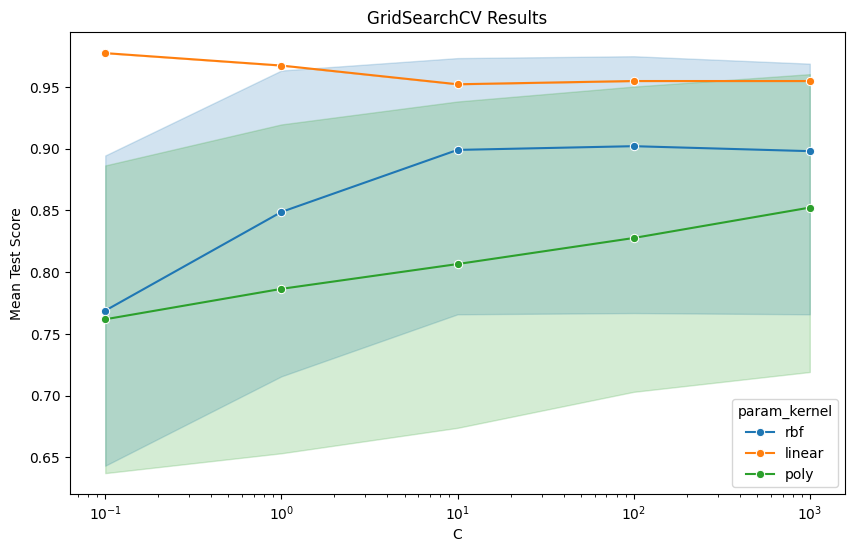

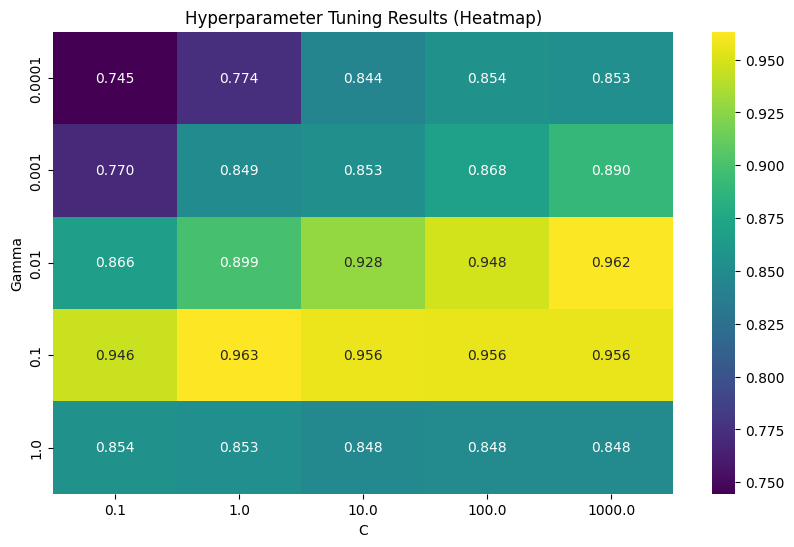

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Perform Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid.best_params_
print(f"Best parameters from GridSearchCV: {best_params}")

# Graphical presentation of GridSearchCV results
results = pd.DataFrame(grid.cv_results_)
results = results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_C', y='mean_test_score', hue='param_kernel', data=results, marker='o')
plt.xscale('log')
plt.title('GridSearchCV Results')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.show()


#Additional Visualization
#Create a heatmap of the mean test scores for different combinations of hyperparameters
scores = pd.pivot_table(results, values='mean_test_score', index='param_gamma', columns='param_C')
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, fmt=".3f", cmap='viridis')
plt.title('Hyperparameter Tuning Results (Heatmap)')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()


Training Accuracy: 0.9874371859296482
Testing Accuracy: 0.9707602339181286
Feature importance is not available for the selected kernel.
Confusion Matrix:
[[ 60   4]
 [  1 106]]
F1-score: 0.9769585253456221
Precision: 0.9636363636363636
Recall: 0.9906542056074766
False Alarm Rate: 0.0625


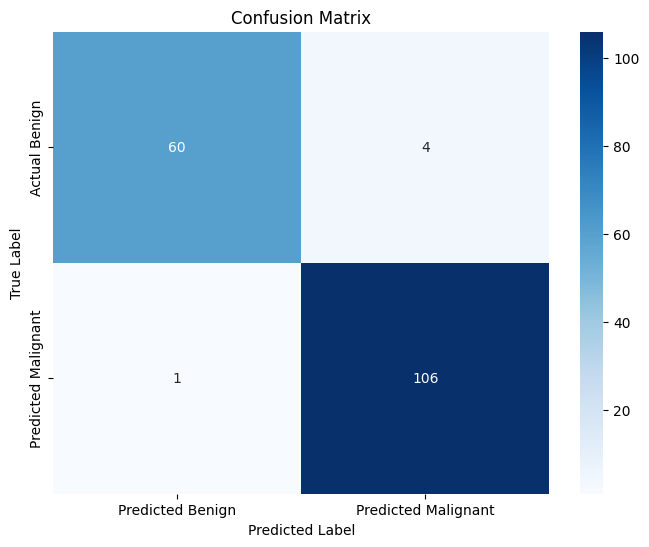

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the trained model (using the best model from GridSearchCV)
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Identify important features
best_svc = grid.best_estimator_

# Check if the best estimator uses a linear kernel
if best_svc.kernel == 'linear':
    importance = best_svc.coef_
    feature_importance = abs(importance[0])
    important_features = np.argsort(feature_importance)[::-1][:5] # top 5 features
    print(f"Important features indices: {important_features}")

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(important_features)), feature_importance[important_features])
    plt.xticks(range(len(important_features)), data.feature_names[important_features], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance is not available for the selected kernel.")
    # Consider using permutation importance or other methods for non-linear kernels


# Confusion Matrix and Metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
false_alarm_rate = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1]) if (conf_matrix[0][0] + conf_matrix[0][1]) > 0 else 0


print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1-score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"False Alarm Rate: {false_alarm_rate}")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Predicted Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

---
**1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?**

* Handling Missing Values: Before scaling, the dataset was inspected for missing values. Since no missing data was detected, no imputation or removal was required. If present, missing values would have been addressed using techniques like mean/median imputation or removal of incomplete entries, depending on the context and impact on the dataset.

* Feature Scaling: The features were standardized using StandardScaler from scikit-learn. This method transforms the data by centering each feature around its mean (subtracting the mean) and scaling it to unit variance (dividing by the standard deviation). Standardization is particularly critical for SVM models, as they rely on distance-based metrics (e.g., Euclidean distance in kernel functions like RBF) to determine decision boundaries. Features with larger scales can dominate the model’s optimization process, leading to biased results. By scaling all features to a comparable range, we ensure equal contribution during training, improving convergence and overall model performance.

---
**2. Why is it necessary to split the dataset into training and testing sets?**

Splitting the dataset into training and testing subsets is critical to assess how well the model performs on unseen data, reflecting its ability to generalize beyond the examples it was trained on. Without this separation, there is no reliable way to measure real-world applicability.

* Training Set: Used to train the SVM model by adjusting its parameters (e.g., weights, support vectors) to learn patterns in the data. This phase involves optimization algorithms (e.g., gradient descent for SVM dual problem) to minimize training error.

* Testing Set: Serves as a "simulation" of real-world data the model has never encountered. Evaluating performance on this subset (using metrics like accuracy, precision, or F1-score) provides an unbiased estimate of the model’s effectiveness, ensuring it does not merely memorize training examples (overfitting).

---
**3. What is the role of StandardScaler in SVM training?**

*Normalizing Feature Contributions*  - SVMs, especially those using distance-based kernels (e.g., RBF or linear), depend on metrics like Euclidean distance to measure similarity between data points. Features with vastly different scales (e.g., "age" ranging 0–100 vs. "annual income" in thousands) can distort these calculations, causing the model to prioritize high-magnitude features.

*Enhancing Computational Efficiency* - Training an SVM involves solving a mathematical optimization problem to maximize the margin between classes.

---
**4. How does C affect the performance of an SVM model?**

The regularization parameter C is central to SVM's ability to balance model complexity and generalization. It directly controls the trade-off between maximizing the margin (to improve robustness) and minimizing classification errors (to fit the training data).

High C (Tight Control):

* The model tries very hard to avoid mistakes on the training data.

* It might create a narrow margin (like drawing a tight boundary) to fit every training point perfectly.

Risk: If the data has noise or outliers, the model might overthink and perform poorly on new data (overfitting).

Low C (Relaxed Control):

* The model cares more about keeping the margin wide and simple, even if it makes a few mistakes.

* It’s more forgiving of training errors, which helps it ignore noise or outliers.

Risk: If set too low, the model might oversimplify and miss important patterns (underfitting).

---
**5. What is the purpose of the kernel function in SVM?**

The kernel function is a powerful tool in SVM that enables the model to solve non-linear classification problems by transforming data into a space where it becomes easier to separate classes.

* Linear Limitation: By default, SVM tries to draw a straight line (or flat hyperplane) to separate classes. However, real-world data is often not linearly separable (e.g., concentric circles, spirals).

* Dimensionality Solution: Kernels map the original input features into a higher-dimensional space where complex patterns can be represented as linear relationships.

---
**6. What were the best hyperparameters found using GridSearchCV?**

GridSearchCV automates the process of finding the optimal hyperparameters for an SVM model by systematically testing all combinations of specified values.

* Hyperparameter Tuning: It evaluates every possible combination of hyperparameters (e.g., C, kernel, gamma) from a predefined grid to identify the configuration that maximizes performance metrics (e.g., accuracy, F1-score).

* Cross-Validation: For each combination, it uses cross-validation (e.g., 5-fold) to ensure the model generalizes well across different subsets of the training data.

---
** 7. What is a confusion matrix, and how is it interpreted? **

A confusion matrix is a diagnostic tool that provides a detailed breakdown of a classification model’s predictions, revealing not just overall accuracy but how and where the model succeeds or fails. It is especially critical for evaluating performance in imbalanced datasets or high-stakes scenarios (e.g., medical testing, fraud detection).  

* True Positives (TP): Correctly predicted positive instances.

* True Negatives (TN): Correctly predicted negative instances.

* False Positives (FP): Negative instances wrongly predicted as positive (Type I Error).

* False Negatives (FN): Positive instances wrongly predicted as negative (Type II Error).



---
**8. How are Precision, Recall, and F1-score calculated from the confusion matrix?**

- Precision: TP / (TP + FP) - Measures how accurate positive predictions are.
- Recall: TP / (TP + FN) - Measures how well the model captures actual positives.
- F1-score: 2 * (Precision * Recall) / (Precision + Recall) - Harmonic mean of Precision and Recall.


---
**9. If the model does not perform well, what adjustments can be made to improve it?**

Improving model performance requires a systematic approach to diagnose issues and iteratively refine the model.

* Hyperparameter Tuning - Optimize the balance between model complexity and generalization.
* Feature Engineering - Create new features (interactions, polynomials) or reduce noise via PCA/feature selection.
* Switch SVM Kernels - Test non-linear kernels (RBF, polynomial) if data isn’t linearly separable.
* Handle Class Imbalance - Use resampling (SMOTE for oversampling), adjust class weights (class_weight='balanced'), or prioritize F1-score over accuracy.
* Improve Data Quality - Collect more data, clean outliers, or augment existing data (e.g., image/text transformations).
* Try Alternative Models - Use Random Forest, XGBoost, or Logistic Regression if SVM underperforms.
* Regularization & Thresholds - Reduce overfitting with lower C or adjust classification thresholds to balance precision/recall.

---